### 1.Preprocessing phase:

In [56]:
# useful lib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import statsmodels.formula.api as smf
from sklearn.metrics import roc_curve, roc_auc_score


In [57]:
df = pd.read_csv('titanic-passengers.csv',sep=';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [58]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [60]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [61]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [62]:
df.dtypes

PassengerId      int64
Survived        object
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [63]:
df['Cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
D              3
              ..
C91            1
D45            1
F G63          1
A34            1
E63            1
Name: Cabin, Length: 147, dtype: int64

In [64]:
df[df["Cabin"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [65]:
#pd.DataFrame(df['Cabin'].value_counts()).plot(kind='bar',figsize=(20,10))

In [66]:
# cabin not mentioned 
df.loc[df['Cabin'].notnull(),'Cabin'] = 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,1,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,1,S


In [67]:
# cabin not mentioned 
df['Cabin'] = df['Cabin'].fillna(0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,0,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,1,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,0,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,0,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,1,S


<AxesSubplot:xlabel='Age', ylabel='Count'>

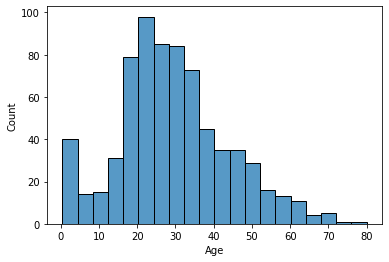

In [68]:
#distirbution of age 
import seaborn as sns
sns.histplot(data=df, x="Age")

In [69]:
#check average age of males and females 
ageMean = pd.DataFrame({'mean':df.groupby(by="Sex",axis=0)['Age'].mean()})
#df.Age.fillna(int(df.Age.mean()),inplace=True)
ageMean.loc['female','mean']
ageMean

,mean
Sex,
female,27.915709
male,30.726645


In [70]:
#fill missing values of females age with average age of females 
mask = df['Sex'] == 'female' 
df.loc[mask,'Age'] = df.loc[mask,'Age'].fillna(ageMean.loc['female','mean'])
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            124
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

In [71]:
#fill missing values of males age with average age of males 
mask = df['Sex'] == 'male' 
df.loc[mask,'Age'] = df.loc[mask,'Age'].fillna(ageMean.loc['male','mean'])
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [72]:
df.dropna(inplace=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

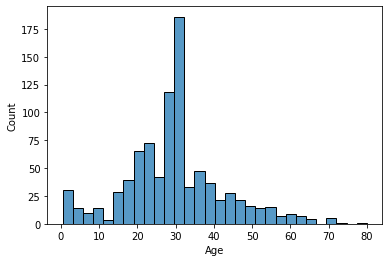

In [73]:
#distirbution of age 
import seaborn as sns
sns.histplot(data=df, x="Age")

<AxesSubplot:xlabel='Sex', ylabel='count'>

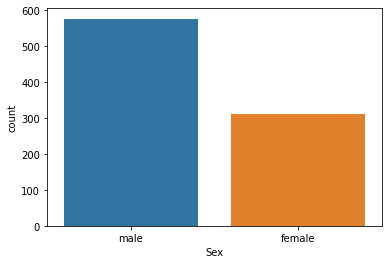

In [74]:
sns.countplot(x="Sex",data=df)

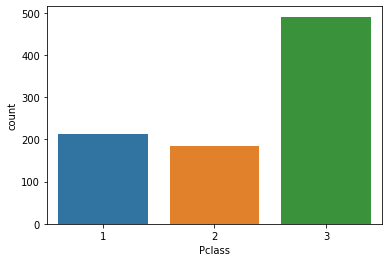

In [75]:
ax = sns.countplot(x="Pclass", data=df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

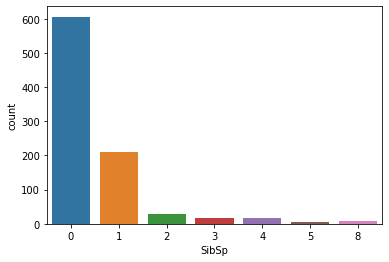

In [76]:
sns.countplot(x="SibSp",data=df)

This graph shows that there are more men than women in the titanic boat. 

<AxesSubplot:xlabel='Survived', ylabel='count'>

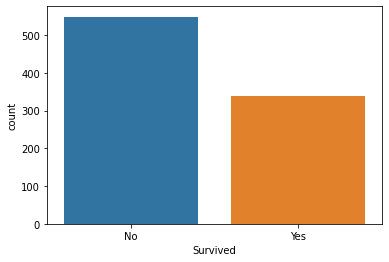

In [77]:
sns.countplot(x="Survived",data=df)

This graph indicates that the number of survivors is about 300 people and that 500 people did not survive. 

In [78]:
df["Sex"].value_counts()
df.loc[(df["Sex"]=="female") & (df["Survived"]=="Yes")]["Survived"].value_counts()
df.loc[(df["Sex"]=="male") & (df["Survived"]=="Yes")]["Survived"].value_counts()

Yes    109
Name: Survived, dtype: int64

#233 femlaes survived over 314==> 74% of females  survived 

#109 males survived over 577 ===> 19% 74% of males survived 

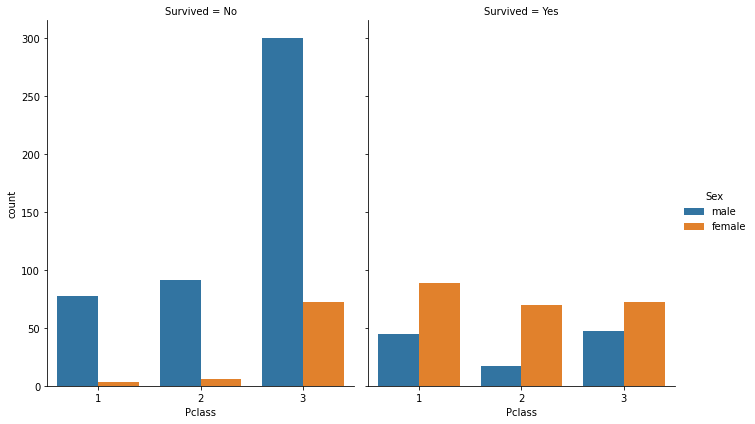

In [79]:
g = sns.catplot(x="Pclass", hue="Sex", col="Survived",
                data=df, kind="count",
                height=6, aspect=.8);

This graph shows the number of survivors by gender, looking at the number of men and women, we noticed that the number of men is higher than the number of women, but the number of women survivors is higher than the number of men. Women had a much better chance of survival, which may be due to the fact that they boarded the lifeboats first, regardless of their class, unlike men. out of 311 women on board, 339 survived. out of 843 men on board, only 161 survived.

c:\users\dell 5400\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\dell 5400\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


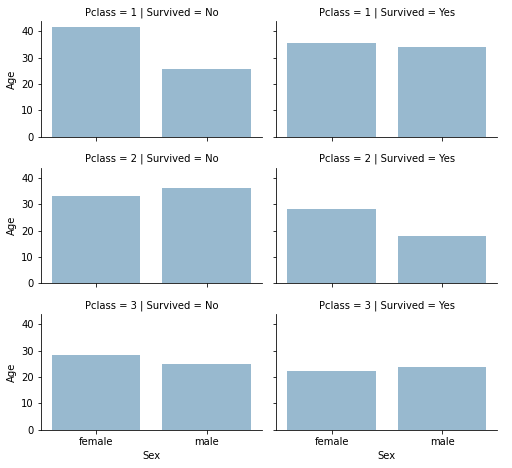

In [80]:
#check correlation between survived and pclass and sex 
grid = sns.FacetGrid(df, row='Pclass',col="Survived", size=2.2, aspect=1.6)
grid.map(sns.barplot  ,"Sex","Age", alpha=.5, ci=None)
grid.add_legend()

Analyzing this graph, we can consider the following remarks:

    **The first and second class have more chances of survival. 
    ** People between 1 and 30 years old have more chances of survival. 
    ** Women have a higher chance of survival than men. 


c:\users\dell 5400\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\dell 5400\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


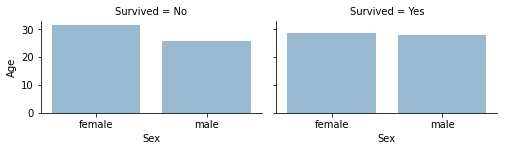

In [81]:
#correlation between age sex 
grid = sns.FacetGrid(df,col="Survived", size=2.2, aspect=1.6)
grid.map(sns.barplot  ,"Sex","Age", alpha=.5, ci=None)
grid.add_legend()

** males or females under 30 years old have better chance to survive

** females have better chance to survive

In [82]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

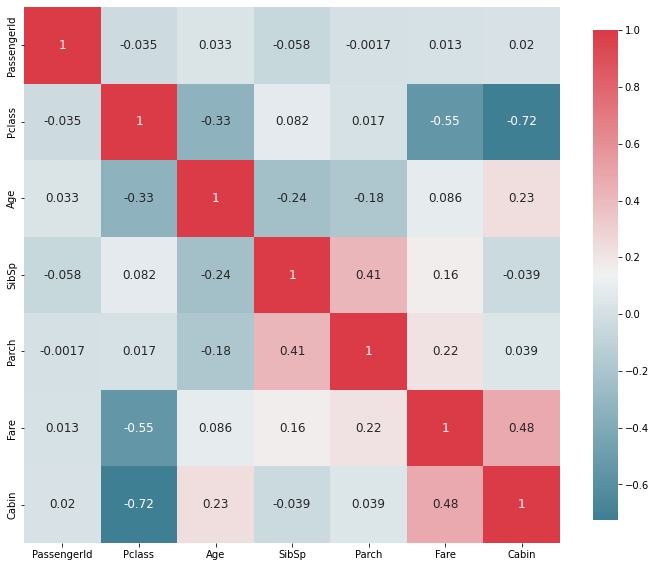

In [83]:
plot_correlation_map( df )

a heatmap denotes how changes between two variables relate. Two variables that change in the same direction are positively correlated. A change in opposite directions implies negative correlation. as we can see the correlation between titanic inputs have a low correlation the highest positive correlation in the inputs are between SibSp and Fare ;; and the highest negative correlation is between fare and pclass (each time the class number decreases the fare increases )

In [84]:
#use the groupby function combined with the mean() to view the relation between Pclass and survived 
df.groupby(by=["Survived","Pclass"]).mean()

PassengerId        Age     SibSp     Parch       Fare  \
Survived Pclass                                                          
No       1        410.300000  41.101579  0.287500  0.300000  64.684007   
         2        452.123711  33.341098  0.319588  0.144330  19.412328   
         3        453.580645  27.570785  0.672043  0.384409  13.669364   
Yes      1        492.455224  34.476079  0.500000  0.395522  95.840984   
         2        439.080460  26.058790  0.494253  0.643678  22.055700   
         3        394.058824  22.935735  0.436975  0.420168  13.694887   

                    Cabin  
Survived Pclass            
No       1       0.737500  
         2       0.030928  
         3       0.016129  
Yes      1       0.858209  
         2       0.149425  
         3       0.050420

In [85]:
df['Title'] = df['Name'].apply(lambda x : x.split(',')[1].split('.')[0].strip())


In [86]:
df.drop('Name', inplace=True, axis=1)

In [87]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,No,2,male,28.0,0,0,248740,13.0000,0,S,Mr
1,76,No,3,male,25.0,0,0,348123,7.6500,1,S,Mr
2,641,No,3,male,20.0,0,0,350050,7.8542,0,S,Mr
3,568,No,3,female,29.0,0,4,349909,21.0750,0,S,Mrs
4,672,No,1,male,31.0,1,0,F.C. 12750,52.0000,1,S,Mr


c:\users\dell 5400\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\dell 5400\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\dell 5400\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


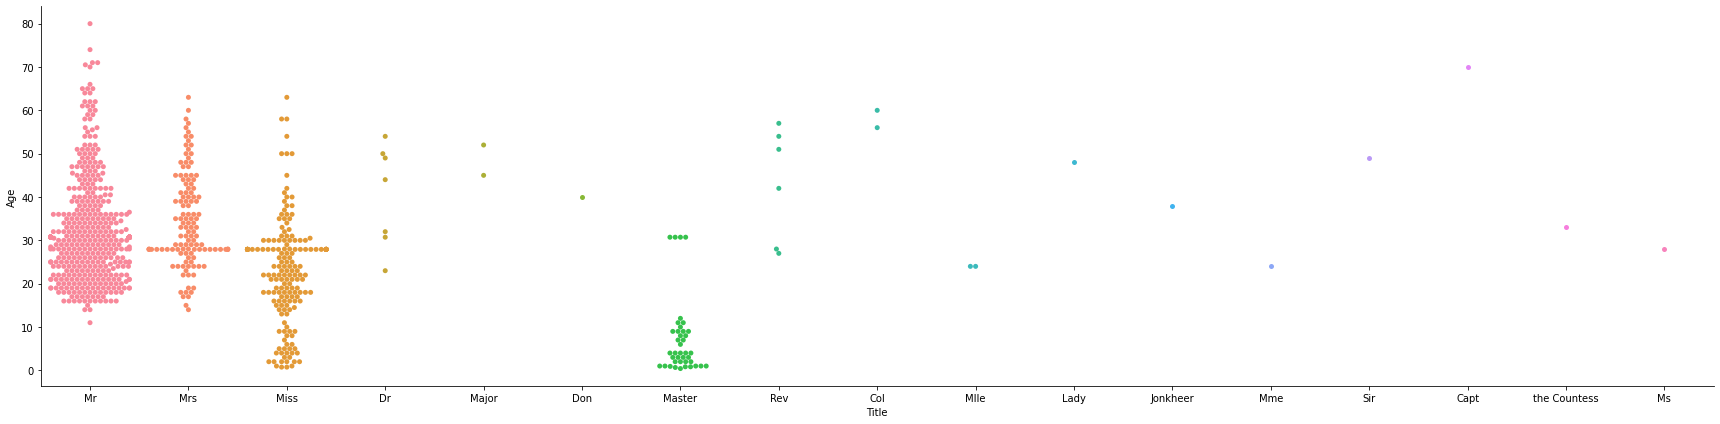

In [88]:
#coorelation between age and title
sns.catplot(x="Title", y="Age", kind="swarm", data=df,size=6,aspect=4,)


c:\users\dell 5400\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


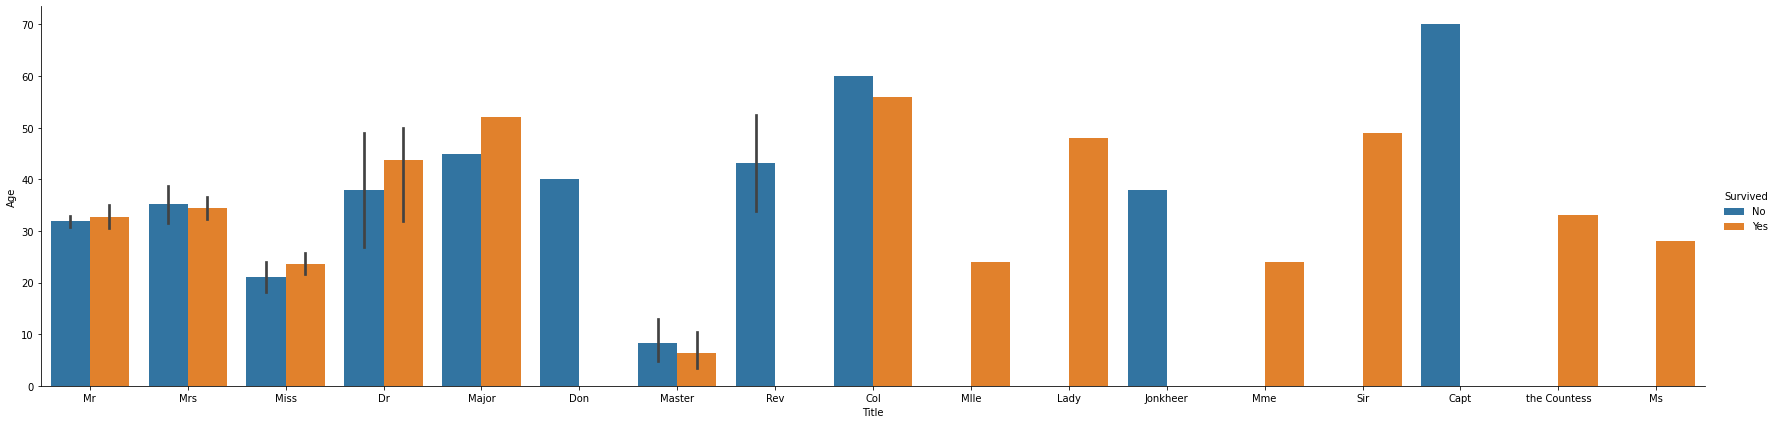

In [89]:
sns.catplot(x="Title", y="Age", hue="Survived", kind="bar", data=df,size=6,aspect=4)

In [90]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }

In [91]:
df['Title'].replace(Title_Dictionary,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,No,2,male,28.0,0,0,248740,13.0000,0,S,Mrs
1,76,No,3,male,25.0,0,0,348123,7.6500,1,S,Mrs
2,641,No,3,male,20.0,0,0,350050,7.8542,0,S,Mrs
3,568,No,3,female,29.0,0,4,349909,21.0750,0,S,Mrs
4,672,No,1,male,31.0,1,0,F.C. 12750,52.0000,1,S,Mrs


c:\users\dell 5400\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


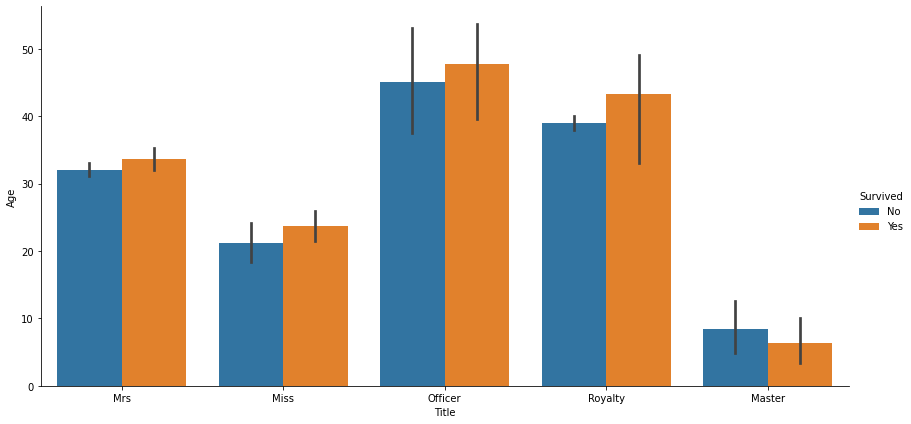

In [92]:
sns.catplot(x="Title", y="Age", hue="Survived", kind="bar", data=df,size=6,aspect=2)

In [93]:
 #Finally, use the Parch and the SibSp columns to create a more useful feature, let's call it FamilySize.
df['FamilySize'] = df["SibSp"] + df["Parch"]


c:\users\dell 5400\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


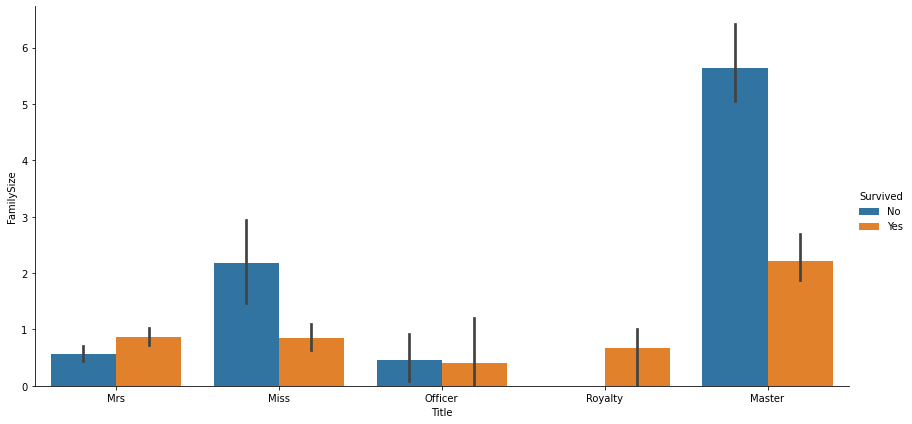

In [94]:
sns.catplot(x="Title", y="FamilySize", hue="Survived", kind="bar", data=df,size=6,aspect=2)

In [95]:
#drop the columns 
df.drop('SibSp',axis=1,inplace=True)
df.drop('Parch',axis=1,inplace=True)

this feature  is important cuz it shows that there is a correlation between Family size and survivals and their title.. as we can see in this graph   Masters have the highest number of familysize and they are more likely to not survive, and all the royality class who has family survived and those who has the title miss and have more than 2 memebrs of family are  more likely to not survive.   

In [96]:
# replacing Survived values with 1 and 0 
df.replace({"Survived":{"Yes":1,"No":0}}, inplace=True)

In [97]:
df.tail()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilySize
886,10,1,2,female,14.000000,237736,30.0708,0,C,Mrs,1
887,61,0,3,male,22.000000,2669,7.2292,0,C,Mrs,0
888,535,0,3,female,30.000000,315084,8.6625,0,S,Miss,0
889,102,0,3,male,30.726645,349215,7.8958,0,S,Mrs,0
890,428,1,2,female,19.000000,250655,26.0000,0,S,Miss,0


#### Delete Ticket

In [104]:
X = df.drop(columns=['Survived','Ticket'], axis = 1)
y = df['Survived']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234)

In [106]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

encoder=LabelEncoder()
X_train['Title'] = encoder.fit_transform(X_train["Title"])
X_test['Title'] = encoder.transform(X_test['Title'])
encoder=LabelEncoder()
X_train['Sex'] = encoder.fit_transform(X_train["Sex"])
X_test['Sex'] = encoder.transform(X_test['Sex'])
encoder=LabelEncoder()
X_train['Embarked'] = encoder.fit_transform(X_train["Embarked"])
X_test['Embarked'] = encoder.transform(X_test['Embarked'])

In [107]:
X_train["Embarked"].value_counts()

2    443
0    122
1     57
Name: Embarked, dtype: int64

In [108]:
# Normalize data .
X_train.dtypes

PassengerId      int64
Pclass           int64
Sex              int32
Age            float64
Fare           float64
Cabin            int64
Embarked         int32
Title            int32
FamilySize       int64
dtype: object

In [109]:
#credit douaa 
def normalize (df):
    features= df.columns
    for column in features:
        mu = df[column].mean()
        sigma = df[column].std()
        df[column] = (df[column] - mu)/sigma


In [110]:
normalize(X_train)
normalize(X_test)

In [111]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
score =accuracy_score(y_test,y_pred) 
score

0.8052434456928839

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

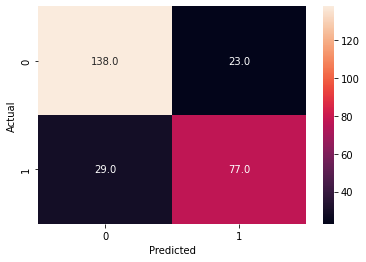

In [112]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True,fmt=".1f")

In [113]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       161
           1       0.77      0.73      0.75       106

    accuracy                           0.81       267
   macro avg       0.80      0.79      0.79       267
weighted avg       0.80      0.81      0.80       267



In [114]:
X_train.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked',
       'Title', 'FamilySize'],
      dtype='object')

In [115]:
myModel1 = smf.ols(formula = "Survived ~   Pclass  + Sex + Age  + Ticket + Fare +Cabin+ Embarked + FamilySize + Title ", data=df)
result1 = myModel1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     3.553
Date:                Fri, 23 Sep 2022   Prob (F-statistic):           6.19e-23
Time:                        19:40:44   Log-Likelihood:                 530.37
No. Observations:                 889   AIC:                             319.3
Df Residuals:                     199   BIC:                             3624.
Df Model:                         689                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.6011     80.624     -0.007      0.994    -159.588     158.385
Sex[T.male]                     -0.5363      0.049    -10.939      0.000      -0.633      -0.440
Ticket[T.110413]                 0.0974      4.346      0.022      0.982      -8.474       8.669
Ticket[T.110465]                 0.2649     21.849      0.012      0.990     -42.821      43.351
Ticket[T.110564]                 1.6992     37.965      0.045      0.964     -73.166      76.564
Ticket[T.110813]                 0.3251      7.138      0.046      0.964     -13.752      14.402
Ticket[T.111240]                 0.6670     33.565      0.020      0.984     -65.522      66.856
Ticket[T.111320]                 0.5353     30.399      0.018      0.986     -59.410      60.480
Ticket[T.111361]                 0.5700     18.065      0.032      0.975     -35.054      36.194
Ticket[T.111369]                 1.5782     35.781      0.044      0.965     -68.981      72.137
Ticket[T.111426]                 1.6403     37.966      0.043      0.966     -73.228      76.508
Ticket[T.111427]                 1.6801     37.965      0.044      0.965     -73.186      76.546
Ticket[T.111428]                 1.7212     37.966      0.045      0.964     -73.146      76.588
Ticket[T.112050]                 1.2167     54.778      0.022      0.982    -106.803     109.236
Ticket[T.112052]                 1.1659     54.778      0.021      0.983    -106.854     109.185
Ticket[T.112053]                 1.1044     35.780      0.031      0.975     -69.453      71.662
Ticket[T.112058]                 1.1928     54.777      0.022      0.983    -106.826     109.212
Ticket[T.112059]                 1.2195     54.778      0.022      0.982    -106.800     109.239
Ticket[T.112277]                 1.6002     35.149      0.046      0.964     -67.711      70.912
Ticket[T.112379]                 0.4408     29.703      0.015      0.988     -58.132      59.014
Ticket[T.113028]                 0.7071     37.965      0.019      0.985     -74.158      75.572
Ticket[T.113043]                 0.7139     36.731      0.019      0.985     -71.718      73.146
Ticket[T.113050]                 0.7998     37.966      0.021      0.983     -74.067      75.666
Ticket[T.113051]                 0.6309     37.206      0.017      0.986     -72.738      74.000
Ticket[T.113055]                 1.7654     37.966      0.047      0.963     -73.102      76.632
Ticket[T.113056]                 0.7171     38.313      0.019      0.985     -74.835      76.269
Ticket[T.113059]                 0.2963     24.953      0.012      0.991     -48.910      49.502
Ticket[T.113501]                 0.6390     35.780      0.018      0.986     -69.918      71.196
Ticket[T.113503]                -2.7132     79.158     -0.034      0.973    

remove all the features who has p-value > 0.05 : Fare / Ticket 

In [116]:
myModel1 = smf.ols(formula = "Survived ~   Pclass  + Sex + Age   +Cabin+ Embarked + FamilySize + Title ", data=df)
result1 = myModel1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     63.64
Date:                Fri, 23 Sep 2022   Prob (F-statistic):          7.06e-104
Time:                        19:40:45   Log-Likelihood:                -359.12
No. Observations:                 889   AIC:                             742.2
Df Residuals:                     877   BIC:                             799.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.8212      0.103     17.758      0.000       1.620       2.023
Sex[T.male]         -0.6333      0.038    -16.751      0.000      -0.708      -0.559
Embarked[T.Q]       -0.0214      0.054     -0.399      0.690      -0.127       0.084
Embarked[T.S]       -0.0672      0.033     -2.057      0.040      -0.131      -0.003
Title[T.Miss]       -0.6521      0.080     -8.134      0.000      -0.809      -0.495
Title[T.Mrs]        -0.5433      0.071     -7.642      0.000      -0.683      -0.404
Title[T.Officer]    -0.5569      0.115     -4.844      0.000      -0.783      -0.331
Title[T.Royalty]    -0.5748      0.180     -3.185      0.002      -0.929      -0.221
Pclass              -0.1298      0.023     -5.647      0.000      -0.175      -0.085
Age                 -0.0036      0.001     -3.085      0.002      -0.006      -0.001
Cabin                0.1061      0.043      2.481      0.013       0.022       0.190
FamilySize          -0.0573      0.009     -6.612      0.000      -0.074      -0.040
==============================================================================
Omnibus:                       42.282   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.489
Skew:                           0.530   Prob(JB):                     4.87e-11
Kurtosis:                       3.400   Cond. No.                         530.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

we can notice that the AIC AND BIC values decreased when we removed Fare / Ticket

In [117]:
# Select the features 
X = df.drop(['Survived','Fare','Ticket'], axis = 1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234)
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

encoder=LabelEncoder()
X_train['Title'] = encoder.fit_transform(X_train["Title"])
X_test['Title'] = encoder.transform(X_test['Title'])
encoder=LabelEncoder()
X_train['Sex'] = encoder.fit_transform(X_train["Sex"])
X_test['Sex'] = encoder.transform(X_test['Sex'])
encoder=LabelEncoder()
X_train['Embarked'] = encoder.fit_transform(X_train["Embarked"])
X_test['Embarked'] = encoder.transform(X_test['Embarked'])

normalize(X_train)
normalize(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
score =accuracy_score(y_test,y_pred) 
score

0.8052434456928839

# Roc Curve

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

* True Positive Rate
* False Positive Rate

True Positive Rate (TPR) is a synonym for recall and is therefore defined as follows:
* `TPR = TP / TP + FN`
False Positive Rate (TPR) is a synonym for recall and is therefore defined as follows:
* `TPR = FP / FP + TN`

An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.

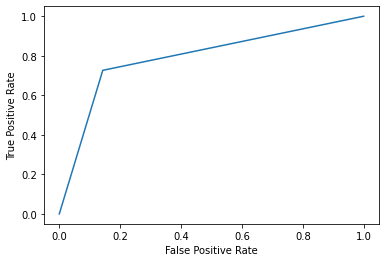

In [118]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC: Area Under the ROC Curve

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve.

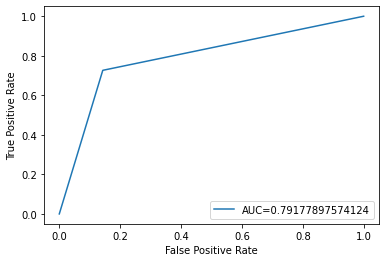

In [119]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()